# ISEL - CPS 
## Semestre 2021/22

# HRTF - exploração inicial

In [26]:
folder = "./HRTF/compact/elev0/"
#fp = open(folder+'H0e000a.dat','rb')#,'ieee-be'); #'b' or 'ieee-be' Big-endian ordering
fp = open(folder+'H0e045a.dat','rb')#,'ieee-be'); #'b' or 'ieee-be' Big-endian ordering
print("Name of the file: ", fp.name)
data = fp.read(256)
#data = fread(fp, 256, 'short')
fp.close()

leftimp = data[0:2:]
rightimp = data[1:2:256]

Name of the file:  ./HRTF/compact/elev0/H0e045a.dat


In [27]:
data

b'\x00\x03\xff\xb0\x00\x00\x00b\x00\x00\xff\x98\x00\x00\x00m\xff\xff\xff:\x00\x01\x0e\xf3\x00\x016\xdc\xff\xfe\xfb\xb0\x00\x01\xcc\x1a\x00\x03\xec\xb0\xff\xfd\t\xe8\x00\x07\x1e_\xff\xfe\n[\x00\x074\xea\xff\xf8V\x9b\x00\x10\n \xff\xf5\xe2\x10\x00\x0e\xff\xa2\x00\x03\xef\xba\x00\x17\xd3\x84\x00\x1a\xdf\x05\x04\xa6\xd9^\t\xbc\xe3K\xfd\xf4\xf1y\xfd\xa3\xfb\x8c\x03\xa4\x02)\xfb\xdd\x05\xac\x02\x02\x15\xf4\t\x0f\x0f:\x06X\x02\x9e\x0c\x1c\t\x9e\x15\x90\x0f=\x08\xf6\x03\xa5\xfb\xd0\xfef\x03\xe5\x00=\x00\xa3\x02C\xf2l\x01\x98\xf5\x8f\xfe\xa3\xfb\xdd\xf9\xb7\xf4\xef\xee\x95\xf5\xa8\xeb\x12\xfe\x7f\xef\xbe\xff\xca\xf3\xbe\xff[\xf7A\x03\xe5\xfc\x10\x07.\x01\xbf\x05\x18\x03\x97\x04\xf4\x05\x13\x06\x14\x06\xec\x03\x85\x07\xd0\x012\x07c\x01\x15\x06\x94\xff\xec\x04b\xfdr\x00\xa6\xfc?\xff$\xfc\x08\xfe\xc3\xfa\xfe\xfe/\xf9?\xfc\xad\xf8\xb0\xfcD\xf9\xb0\xfb\xbb\xfb\x17\xfa"\xfd\n\xfb\n\xfe\xec\xfd\xce\x00\x15\xfe\x9d'

In [28]:
import numpy as np
folder = "./HRTF/compact/elev0/"
numpy_data00 = np.fromfile(folder+'H0e000a.dat',dtype='short')
numpy_data80 = np.fromfile(folder+'H0e080a.dat',dtype='short')
#https://www.stackvidhya.com/python-read-binary-file/
leftimp00= numpy_data00[0::2]
rightimp00 = numpy_data00[1::2]
leftimp80= numpy_data80[0::2]
rightimp80 = numpy_data80[1::2]

In [29]:
len(numpy_data80)

256

In [30]:
numpy_data80

array([     0,  -5890,     -1, -19455,     -1, -10499,     -1,   5159,
           -1,   1852,     -1,  23227,      0,  18112,     -1,  26407,
          256,   3612,      0,    251,      0,  -3263,     -1,  -6052,
            0,   9448,    512, -14880,      0, -12003,      0, -20218,
           -1, -22048,     -1,  24805,    256,   4317,    256,  14046,
          256, -19719,   2816, -11271,    256,  29932,   -257,   1514,
         7680,  15365,   2304,  23051,  -3329, -32001,  -2561,   4878,
           -1,   7702, -24576, -30966,  22788, -27387, -18171,  22795,
       -16895,   -765, -15872,  18938,   6912,  22774,  -3073,   8694,
        14339,   2546,   -508,   5357, -29946,  19183,   4620,   6900,
         -498, -28420, -13560,   6914,  -5371,  -4862, -23289,  -6399,
       -27903,  32514,   6906, -22268, -20231, -11515,  25081,   5381,
        -2570,  30725, -17673,  12036, -25863,  16384,  -3847,  14847,
       -16902,  25344, -20740,  25342,  12542,  26363,  23551, -11270,
      

In [31]:
leftimp= numpy_data80[0::2]
rightimp = numpy_data80[1::2]

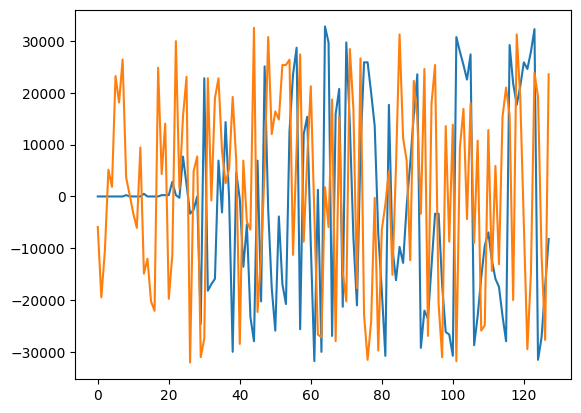

In [32]:
import matplotlib.pyplot as plt
plt.plot(leftimp)
plt.plot(rightimp)

In [33]:
from scipy.io import wavfile
samplerate, data = wavfile.read("./Sons/saxofone.wav")
data= data.astype('float')
data.dtype

dtype('float64')

In [34]:
from IPython.display import Audio,display
display(Audio(data,rate=samplerate))

In [35]:
lchannel00=np.convolve(leftimp00,data*1.0)
rchannel00=np.convolve(rightimp00,data*1.0)
lchannel80=np.convolve(leftimp80,data*1.0)
rchannel80=np.convolve(rightimp80,data*1.0)

In [36]:
newData80 = np.zeros((len(lchannel80),2))
newData80[:,0] = lchannel80/np.max(np.abs(lchannel80))*2**15
newData80[:,1] = rchannel80/np.max(np.abs(rchannel80))*2**15
newData00 = np.zeros((len(lchannel00),2))
newData00[:,0] = lchannel00/np.max(np.abs(lchannel00))*2**15
newData00[:,1] = rchannel00/np.max(np.abs(rchannel00))*2**15
wavfile.write("example00.wav", samplerate, newData00.astype(np.int16))
wavfile.write("example80.wav", samplerate, newData80.astype(np.int16))

In [37]:
newData00.shape

(323506, 2)

In [38]:
# equivalente ao convolve mas usando o lfilter(bk, ak) -> eq às diferencas de PDS
import scipy.signal as ss
lc00=ss.lfilter(leftimp00,[1.0],data)
rc00=ss.lfilter(rightimp00,[1.0],data)


# Reverb

$h(n) = {\beta}_n e^{\frac{-C}{F_s}n}$

${\beta}_n \sim N(0, \sigma^2)$

$C= 3 ln(\frac{10}{RT60})$


In [39]:
samplerate

22050

In [40]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the ``standard_normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python

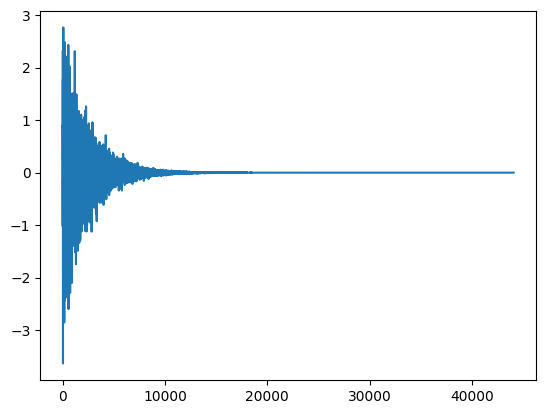

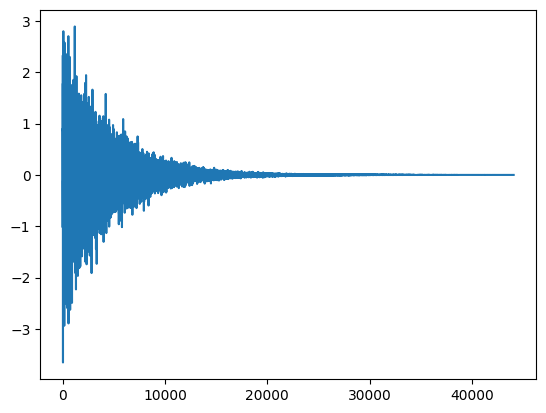

In [41]:
import matplotlib.pyplot as plt

Fs = samplerate
n = np.arange(0,2*Fs)
RT60_2 = 2
C2 = 3*np.log(10/RT60_2)
RT60_1 = 0.5
C1 = 3*np.log(10/RT60_1)
beta = np.random.randn(len(n))
hreverb1 = beta * np.exp(-C1/Fs*n)
hreverb2 = beta * np.exp(-C2/Fs*n)
plt.plot(hreverb1)
plt.figure()
plt.plot(hreverb2)

In [43]:
hreverb1

array([ 8.73399451e-01,  9.01089906e-01,  1.86893990e-01, ...,
        3.10604984e-08, -5.94488290e-09,  1.31099312e-08])

In [ ]:
import scipy.signal as ss
lcReverb=ss.lfilter(hreverb1,[1.0],data)
rcReverb=ss.lfilter(hreverb1,[1.0],data)
newDataReverb = np.zeros((len(lcReverb),2))
newDataReverb[:,0] = lcReverb/np.max(np.abs(lcReverb))*2**15
newDataReverb[:,1] = rcReverb/np.max(np.abs(rcReverb))*2**15
wavfile.write("exampleReverb.wav", samplerate, newDataReverb.astype(np.int16))